<a href="https://colab.research.google.com/github/RashmiBhagya/Transfer-Leaning-With-Image-Clasifier-Banana-Detection/blob/main/banana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q

!pip install opendatasets -q



In [2]:
# import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

import opendatasets as od

Load Dataset

In [3]:
# download dataset
od.download("https://www.kaggle.com/datasets/rashmipremadasa/healthy-banana-identify-dataset-chemical-or-not")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rashmipremadasa
Your Kaggle Key: ··········


100%|██████████| 1.80G/1.80G [00:22<00:00, 86.0MB/s]


In [4]:
BATCH_SIZE = 32
IMAGE_SIZE = (256,256)

In [5]:
train_data_dir = "/content/healthy-banana-identify-dataset-chemical-or-not/Banana/Banana/Banana/Test"
test_data_dir = "/content/healthy-banana-identify-dataset-chemical-or-not/Banana/Banana/Banana/Train"


In [6]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='training',
                                                         validation_split=0.1,
                                                         seed=42)

validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='validation',
                                                         validation_split=0.1,
                                                         seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE)

Found 337 files belonging to 2 classes.
Using 304 files for training.
Found 337 files belonging to 2 classes.
Using 33 files for validation.
Found 1627 files belonging to 2 classes.


In [7]:
class_names = train_data.class_names
class_names

['Chemical', 'Non-Chemical']

In [8]:
for image_batch,label_batch in train_data.take(1):
    print(image_batch.shape)
    print(label_batch.shape)

(32, 256, 256, 3)
(32,)


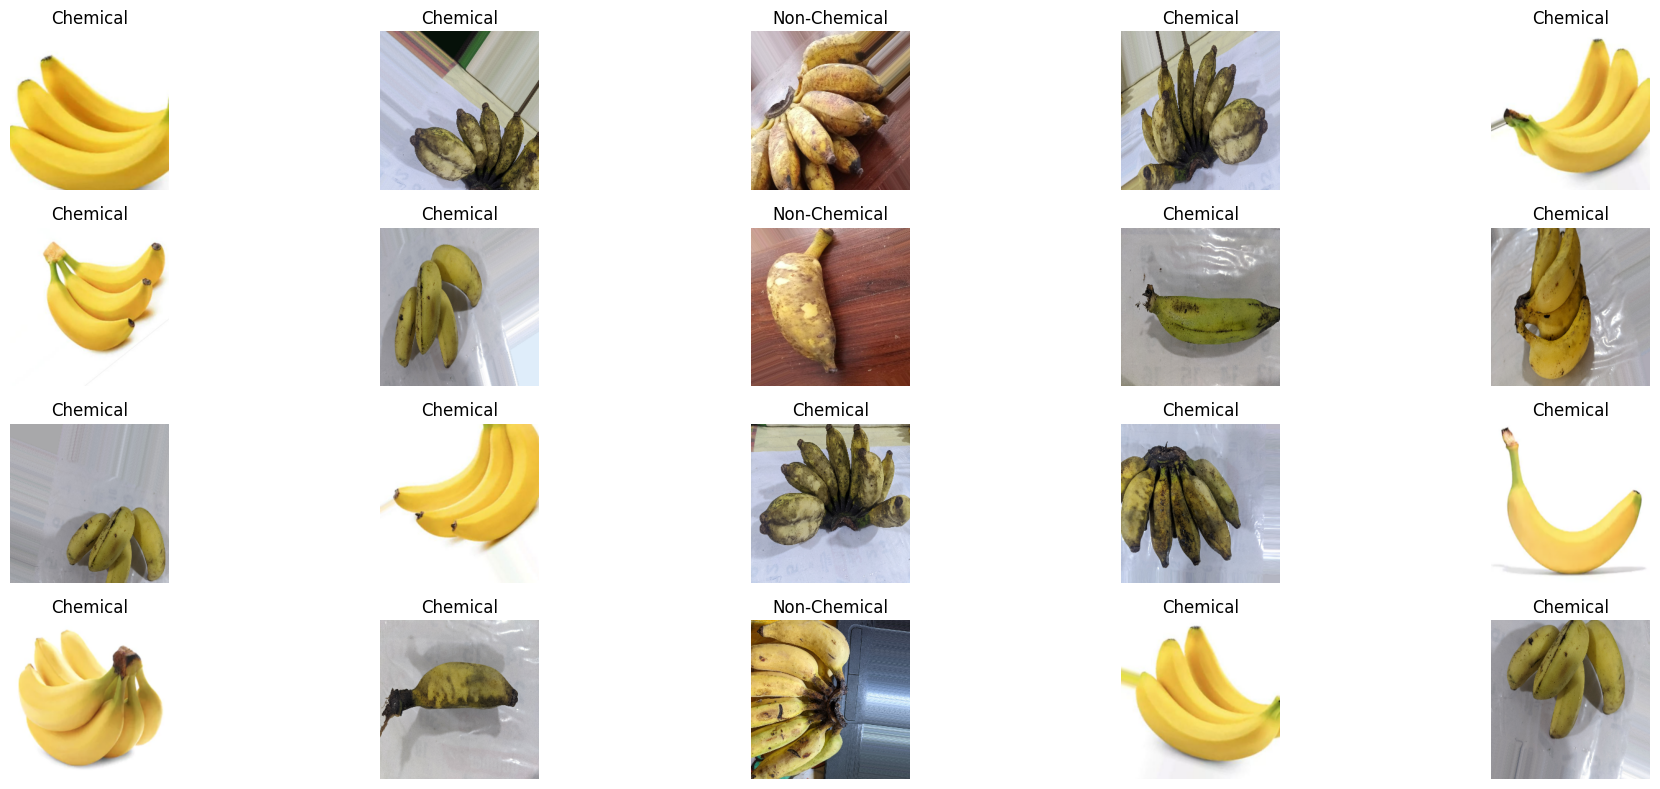

In [9]:
import matplotlib.pyplot as plt

# Plot data sample
plt.figure(figsize=(20, 8))
for image, label in train_data.take(1):
    for i in range(20):
        ax = plt.subplot(4, 5, i+1)  # Adjusted to 4 rows and 5 columns
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')

plt.tight_layout()
plt.show()


Scaling Images


In [10]:
for image,label in train_data.take(1):
    for i in range(1):
      print(image)

tf.Tensor(
[[[[255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   ...
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]]

  [[255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   ...
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]]

  [[255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   ...
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]]

  ...

  [[255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   ...
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]]

  [[255.       255.       255.    

In [11]:
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

In [12]:
for image,label in train_data.take(1):
    for i in range(1):
      print(image)

tf.Tensor(
[[[[0.8156863  0.6431373  0.6       ]
   [0.8        0.627451   0.58431375]
   [0.76875    0.596201   0.55306375]
   ...
   [0.52953434 0.35306373 0.3334559 ]
   [0.5734069  0.3985294  0.3702206 ]
   [0.62328434 0.4507353  0.4154412 ]]

  [[0.8159314  0.6433824  0.6002451 ]
   [0.81102943 0.63848037 0.5953431 ]
   [0.7948529  0.6223039  0.57916665]
   ...
   [0.6194853  0.43517157 0.3959559 ]
   [0.54178923 0.36139706 0.31041667]
   [0.5422794  0.36188725 0.31090686]]

  [[0.8020833  0.6295343  0.58639705]
   [0.8156863  0.6431373  0.6       ]
   [0.80784315 0.63529414 0.5921569 ]
   ...
   [0.61335784 0.421201   0.36629903]
   [0.6383578  0.44620097 0.3841912 ]
   [0.6544118  0.46409315 0.39191177]]

  ...

  [[0.50980395 0.3019608  0.27058825]
   [0.5262255  0.31838235 0.2870098 ]
   [0.54509807 0.3372549  0.30588236]
   ...
   [0.41703433 0.15428922 0.08762255]
   [0.42046568 0.1577206  0.09105392]
   [0.42169118 0.15894608 0.09227941]]

  [[0.53333336 0.32941177 0.278431

Transfer Learning

In [13]:
pretrained_model = tf.keras.applications.xception.Xception(include_top=False,
                                                           input_shape=(256,256,3),
                                                           weights="imagenet",
                                                           pooling='max')

for layer in pretrained_model.layers:
        layer.trainable=False

83683744/83683744 [==============================] - 0s 0us/step


Data Augmentation

In [14]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",input_shape=(256,256,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
  ]
)

Model Building

In [15]:
model = tf.keras.models.Sequential()

model.add(pretrained_model)

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 21144425 (80.66 MB)
Trainable params: 28

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

Model Training

In [38]:
start_time = time.time()

history = model.fit(train_data,
                    epochs=10,
                    validation_data=validation_data)

end_time = time.time()

Epoch 1/10
10/10 [==============================] - 12s 381ms/step - loss: 0.0557 - accuracy: 0.9868 - val_loss: 0.0675 - val_accuracy: 1.0000
Epoch 2/10
10/10 [==============================] - 11s 355ms/step - loss: 0.0341 - accuracy: 0.9868 - val_loss: 0.0496 - val_accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 13s 338ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.0477 - val_accuracy: 0.9697
Epoch 4/10
10/10 [==============================] - 13s 331ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0220 - val_accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 13s 322ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0241 - val_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 13s 310ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 12s 364ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0137 - val_accuracy: 1.0000

In [39]:
print(f'Total time for training {(end_time-start_time):.3f} seconds')

Total time for training 188.973 seconds


Performance Analysis

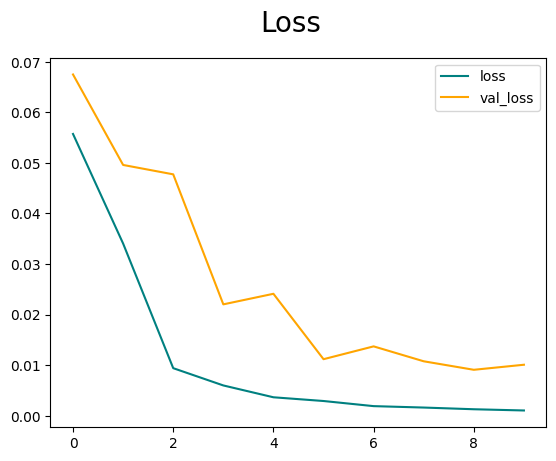

In [40]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

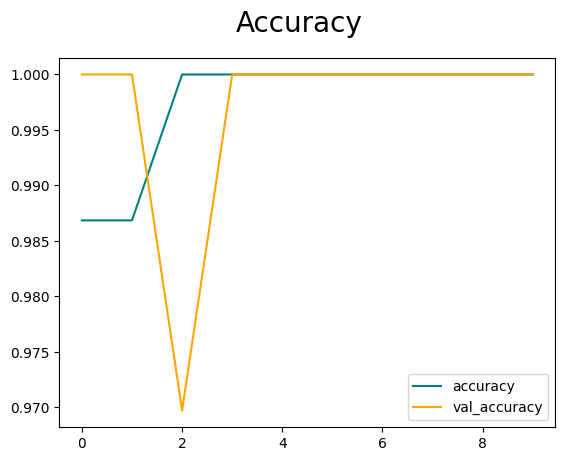

In [41]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

Model Evaluation

In [42]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [43]:
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 37ms/step


In [44]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7777778>

In [45]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7663657>

In [46]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.75353414>

Test

In [47]:
!pip install opencv-python -q

In [28]:
import cv2

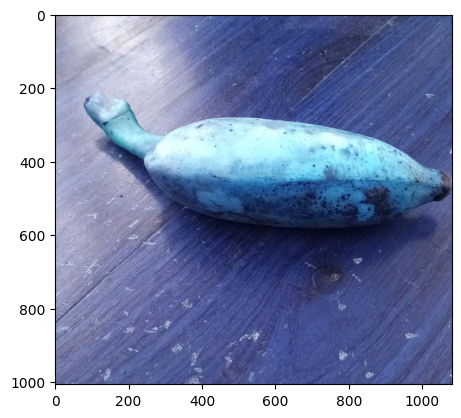

In [175]:
image = cv2.imread('/content/healthy-banana-identify-dataset-chemical-or-not/Banana/Banana/Banana/Test/Non-Chemical/6.jpeg')
plt.imshow(image)
plt.show()

In [176]:
resized_image = tf.image.resize(image, IMAGE_SIZE)
scaled_image = resized_image/255


In [177]:
scaled_image.shape

TensorShape([256, 256, 3])

In [178]:
np.expand_dims(scaled_image, 0).shape

(1, 256, 256, 3)

In [179]:
yhat = model.predict(np.expand_dims(scaled_image, 0))

1/1 [==============================] - 0s 25ms/step


In [180]:
yhat

array([[0.9892758]], dtype=float32)

In [54]:
class_names

['Chemical', 'Non-Chemical']

In [181]:
if yhat > 0.5:
    print(f'{class_names[1]}')
else:
    print(f'{class_names[0]}')


Non-Chemical
